In [118]:
import pandas as pd
import numpy as np
from glob import glob, iglob

df = pd.DataFrame()

# iglob使用較少memory
for csv in iglob('./0821/*_top500_clean.csv'):
    tmp_df = pd.read_csv(csv)
    df = df.append(tmp_df, ignore_index=True)

In [16]:
df.head()

,title,uri,lat,lng,hotel_address,hotel_star,hotel_city,hotel_section,price_range,avg_rating,comment_count
0,砝傣岸民宿,https://www.tripadvisor.com.tw/Hotel_Review-g1...,23.659290,121.419960,光復鄉大進村中興路176巷1弄2號,3.5,花蓮,光復鄉,-NT$1,4.0,1.0
1,雙鳳大旅社,https://www.tripadvisor.com.tw/Hotel_Review-g1...,23.993031,121.593353,復興街5號,2.0,花蓮,花蓮市,"NT$597 - NT$2,766",3.5,11.0
2,小莫里民宿,https://www.tripadvisor.com.tw/Hotel_Review-g1...,24.031643,121.604553,新城鄉北埔路159號,3.5,花蓮,新城,"NT$1,540 - NT$3,238",5.0,3.0
3,玉里族語咖啡民宿,https://www.tripadvisor.com.tw/Hotel_Review-g1...,23.506580,121.366173,卓溪村中正部落1鄰6-1號,2.5,花蓮,卓溪,"NT$1,792 - NT$2,829",4.0,1.0
4,聽海說故事民宿,https://www.tripadvisor.com.tw/Hotel_Review-g1...,23.974270,121.606018,花蓮市海濱街16-1號,3.0,花蓮,花蓮市,"NT$2,672 - NT$5,878",5.0,12.0


將價格資料轉從字串成數值

In [119]:
rangeList = df['price_range'].str.replace('NT\$', '').str.replace('\- ', '-').str.replace('\,', '').str.split('-').tolist()

確保所有資料都有起始與終止價格

In [120]:
length = max(map(len, rangeList)) # should be 2
rangeArray = np.array([[1]*(length-len(xi))+xi for xi in rangeList]) # 缺的值補 1

In [121]:
df2 = pd.DataFrame()
df2['lowest_price'] = rangeArray[:, 0]
df2['highest_price'] = rangeArray[:, 1]
df2.head()

,lowest_price,highest_price
0,1194,2891
1,1980,3142
2,1885,3645
3,1163,2734
4,2357,3582


找出空的str

In [90]:
np.where(df2.applymap(lambda x: x == ''))

(array([   0,   23,   47,  144,  197,  227,  247,  287,  363,  366,  470,
         495,  786,  828,  836,  858,  863,  872,  890,  906,  909,  927,
         936,  958, 1018, 1027, 1110, 1163, 1298, 1305, 1308, 1339, 1379,
        1394, 1407, 1421, 1460, 1464, 1509, 1550, 1593, 1632, 1678, 1723,
        1739, 1789, 1791, 1803, 1825, 1842, 1845, 1847, 1867, 1871, 1885,
        1890, 1910], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [122]:
df2.loc[df2['lowest_price'] == '', 'lowest_price'] = 0

In [123]:
df2.lowest_price = pd.to_numeric(df2['lowest_price'])
df2.highest_price = pd.to_numeric(df2['highest_price'])

In [124]:
print(df.shape)
print(df2.shape)

(4047, 11)
(4047, 2)


In [125]:
df3 = pd.concat([df, df2], axis=1)
df3.head()

,title,uri,lat,lng,hotel_address,hotel_star,hotel_city,hotel_section,price_range,avg_rating,comment_count,lowest_price,highest_price
0,都市叢林汽車旅館,https://www.tripadvisor.com.tw/Hotel_Review-g1...,23.485840,120.427330,四維路269號,4.0,嘉義,西區,"NT$1,194 - NT$2,891",4.0,5.0,1194,2891
1,嘉義市一間老屋旅店,https://www.tripadvisor.com.tw/Hotel_Review-g1...,23.485149,120.481499,成仁街68巷3號,2.0,嘉義,東區,"NT$1,980 - NT$3,142",0.0,0.0,1980,3142
2,晨光飯店,https://www.tripadvisor.com.tw/Hotel_Review-g1...,23.478014,120.448792,西區光彩街389號,3.5,嘉義,西區,"NT$1,885 - NT$3,645",4.5,15.0,1885,3645
3,嘉義優遊商旅,https://www.tripadvisor.com.tw/Hotel_Review-g1...,23.482740,120.463081,西區中山路617號11樓,3.0,嘉義,東區,"NT$1,163 - NT$2,734",3.5,41.0,1163,2734
4,寬悅花園酒店,https://www.tripadvisor.com.tw/Hotel_Review-g1...,23.504875,120.449959,保順路69號,4.0,嘉義,東區,"NT$2,357 - NT$3,582",5.0,72.0,2357,3582


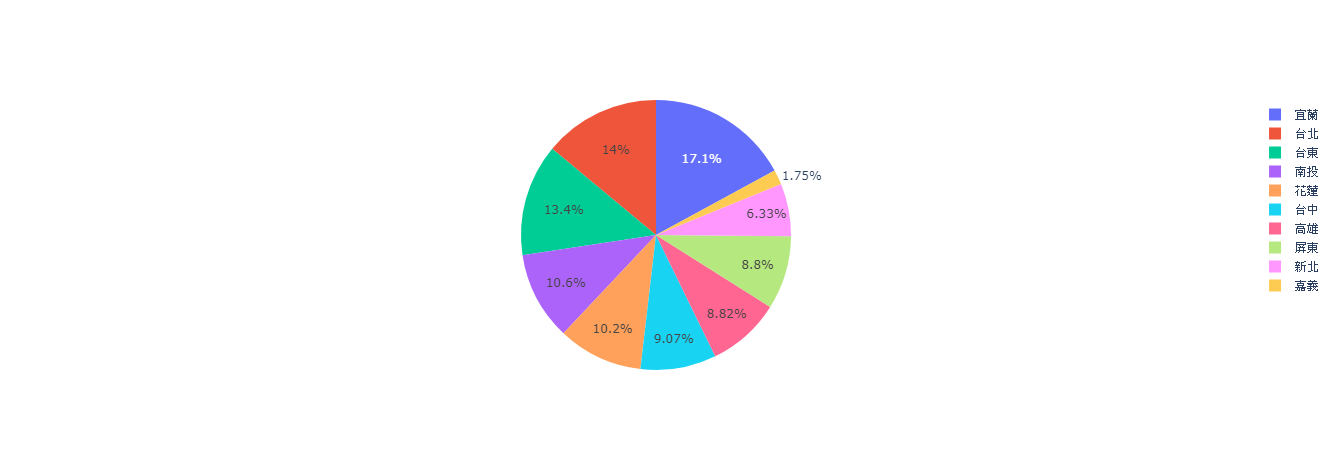

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode, plot
labels = df.groupby(df.hotel_city).agg('count').title.keys().tolist()
values = df.groupby(df.hotel_city).agg('count').title.values.tolist()
trace = go.Pie(labels=labels, values=values)
iplot([trace])

In [115]:
import configparser
config = configparser.ConfigParser()
config.read('./0820/Config.ini')
mapbox_token = config.get('token', 'mapbox')

In [127]:
import plotly.express as px
px.set_mapbox_access_token(mapbox_token)

fig = px.scatter_mapbox(df, text="title",lat="lat", lon="lng", color="avg_rating", size="hotel_star",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6)
fig.show()